# Investor - Flow of Funds - US

### Introduction:

Special thanks to: https://github.com/rgrp for sharing the dataset.

### Step 1. Import the necessary libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (13, 8) #default figure size

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/datasets/investor-flow-of-funds-us/master/data/weekly.csv). 

In [4]:
url = "https://raw.githubusercontent.com/datasets/investor-flow-of-funds-us/master/data/weekly.csv"
df = pd.read_csv(url)

### Step 3. Assign it to a variable called 

### Step 4.  What is the frequency of the dataset?

In [7]:
df.shape

(44, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 9 columns):
Date               44 non-null object
Total Equity       44 non-null int64
Domestic Equity    44 non-null int64
World Equity       44 non-null int64
Hybrid             44 non-null int64
Total Bond         44 non-null int64
Taxable Bond       44 non-null int64
Municipal Bond     44 non-null int64
Total              44 non-null int64
dtypes: int64(8), object(1)
memory usage: 3.2+ KB


In [8]:
df.head()

,Date,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
0,2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
1,2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2,2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
3,2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
4,2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931


In [ ]:
#weekly?

### Step 5. Set the column Date as the index.

In [9]:
df = df.set_index('Date')

### Step 6. What is the type of the index?

In [10]:
df.index

Index(['2012-12-05', '2012-12-12', '2012-12-19', '2012-12-26', '2013-01-02',
       '2013-01-09', '2014-04-02', '2014-04-09', '2014-04-16', '2014-04-23',
       '2014-04-30', '2014-05-07', '2014-05-14', '2014-05-21', '2014-05-28',
       '2014-06-04', '2014-06-11', '2014-06-18', '2014-06-25', '2014-07-02',
       '2014-07-09', '2014-07-30', '2014-08-06', '2014-08-13', '2014-08-20',
       '2014-08-27', '2014-09-03', '2014-09-10', '2014-11-05', '2014-11-12',
       '2014-11-19', '2014-11-25', '2015-01-07', '2015-01-14', '2015-01-21',
       '2015-01-28', '2015-02-04', '2015-02-11', '2015-03-04', '2015-03-11',
       '2015-03-18', '2015-03-25', '2015-04-01', '2015-04-08'],
      dtype='object', name='Date')

### Step 7. Set the index to a DatetimeIndex type

In [11]:
df.index = pd.to_datetime(df.index)

### Step 8.  Change the frequency to monthly, sum the values and assign it to monthly.

In [18]:
df.head()

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931


In [21]:
monthly = df.to_period(freq='M').groupby(pd.Grouper(freq='M')).sum()

### Step 9. You will notice that it filled the dataFrame with months that don't have any data with NaN. Let's drop these rows.

In [23]:
monthly = monthly[(monthly.T != 0).any()]

In [24]:
monthly

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12,-26156,-23126,-3031,526,9848,12613,-2765,-15782
2013-01,3661,-1627,5288,2730,12149,9414,2735,18540
2014-04,10842,1048,9794,4931,8493,7193,1300,24267
2014-05,-2203,-8720,6518,3172,13767,10192,3576,14736
2014-06,2319,-6546,8865,4588,9715,7551,2163,16621
2014-07,-7051,-11128,4078,2666,7506,7026,481,3122
2014-08,1943,-5508,7452,1885,1897,-1013,2910,5723
2014-09,-2767,-6596,3829,1599,3984,2479,1504,2816
2014-11,-2753,-7239,4485,729,14528,11566,2962,12502


### Step 10. Good, now we have the monthly data. Now change the frequency to year.

In [29]:
annually = df.to_period(freq='Y').groupby(pd.Grouper(freq='Y')).sum()

In [30]:
annually

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012,-26156,-23126,-3031,526,9848,12613,-2765,-15782
2013,3661,-1627,5288,2730,12149,9414,2735,18540
2014,330,-44689,45021,19570,59890,44994,14896,79787
2015,15049,-10459,25508,7280,26028,17986,8041,48357


### BONUS: Create your own question and answer it.

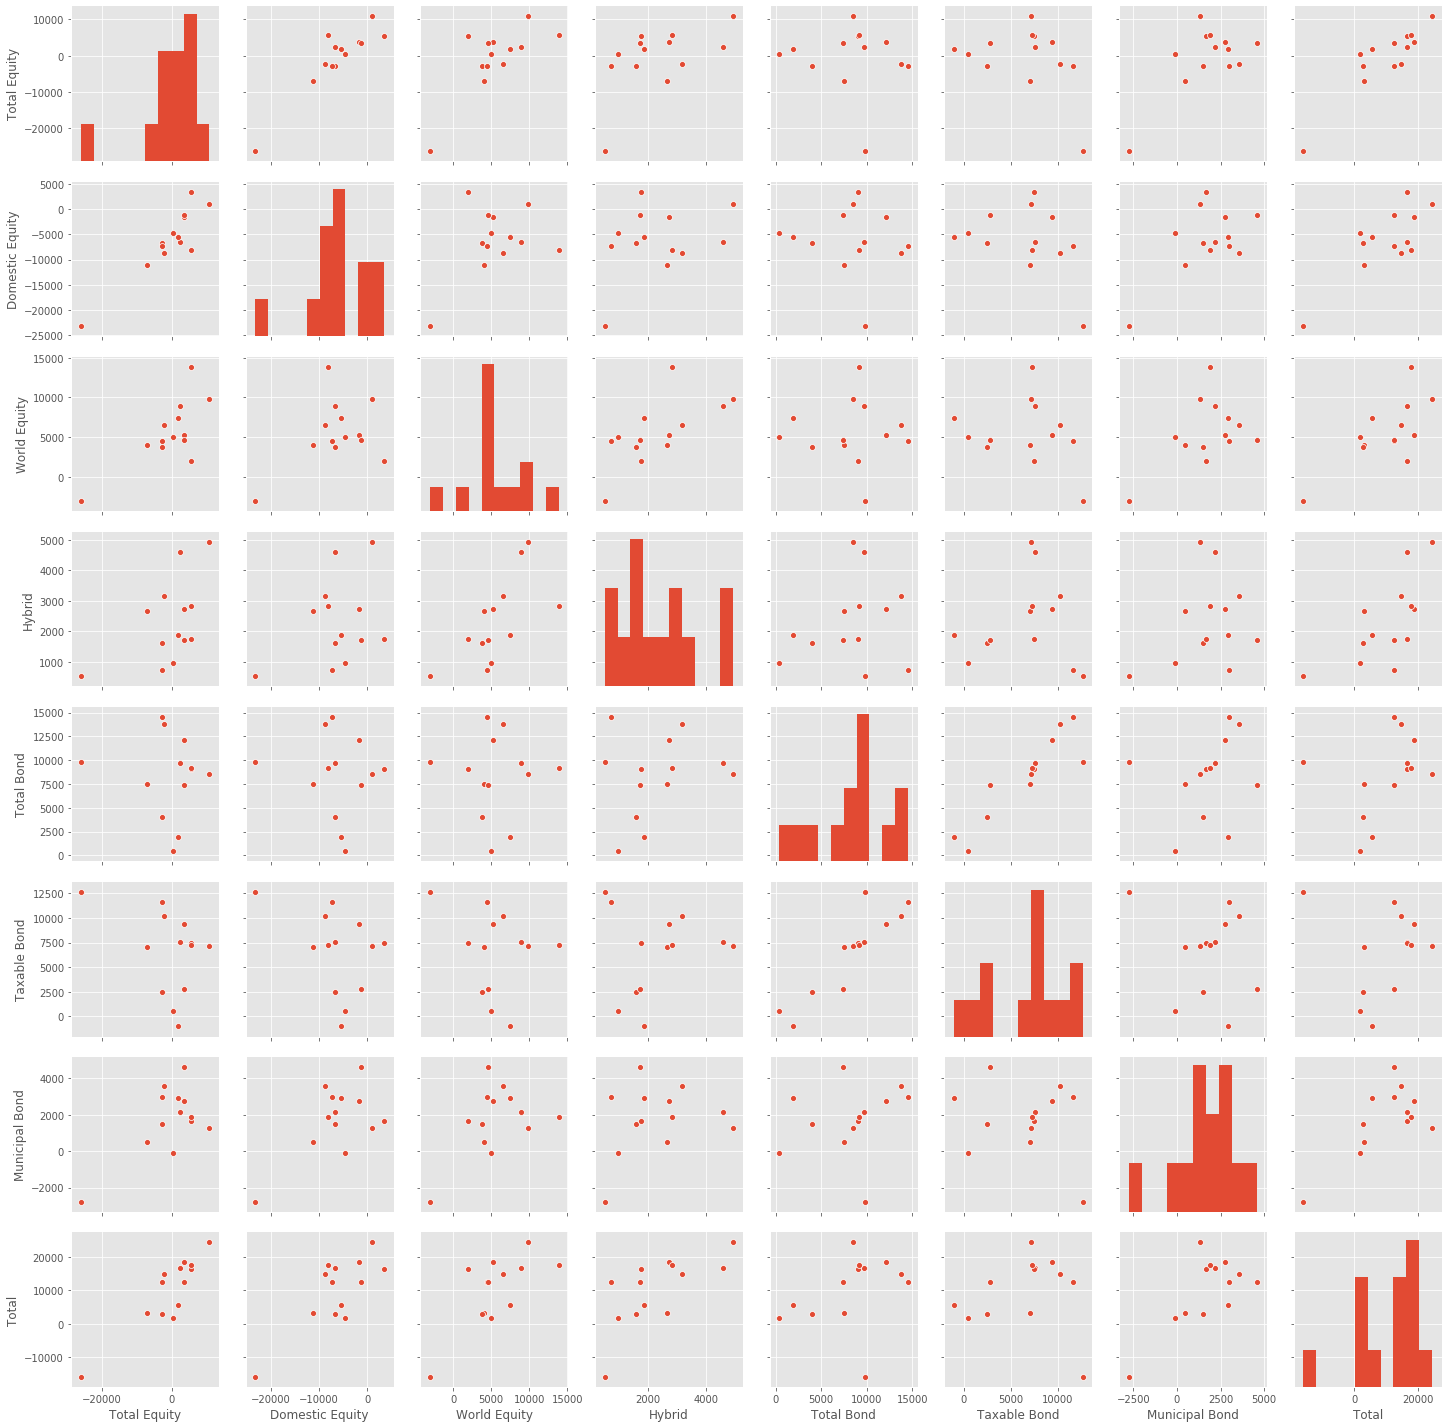

In [36]:
sns.pairplot(monthly)
plt.show()